<a href="https://www.kaggle.com/code/alamukiiraakha/lung-cancer-eda-and-naive-bayes?scriptVersionId=141645112" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/lung-cancer/survey lung cancer.csv


In [2]:
import pandas as pd
data = pd.read_csv('/kaggle/input/lung-cancer/survey lung cancer.csv')
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [4]:
data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [5]:
data.shape

(309, 16)

In [6]:
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [7]:
data.dtypes

GENDER                   object
AGE                       int64
SMOKING                   int64
YELLOW_FINGERS            int64
ANXIETY                   int64
PEER_PRESSURE             int64
CHRONIC DISEASE           int64
FATIGUE                   int64
ALLERGY                   int64
WHEEZING                  int64
ALCOHOL CONSUMING         int64
COUGHING                  int64
SHORTNESS OF BREATH       int64
SWALLOWING DIFFICULTY     int64
CHEST PAIN                int64
LUNG_CANCER              object
dtype: object

In [8]:
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [9]:
data['LUNG_CANCER'].value_counts()

LUNG_CANCER
YES    270
NO      39
Name: count, dtype: int64

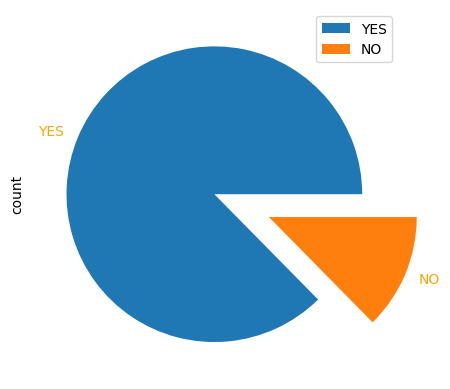

In [10]:
import matplotlib.pyplot as plt
lung_cancer = data['LUNG_CANCER'].value_counts()
lung_cancer.plot(kind='pie', legend=True, textprops = {'color':'orange'}, explode = (0, 0.4))
autopct = '%.2f'
plt.show()

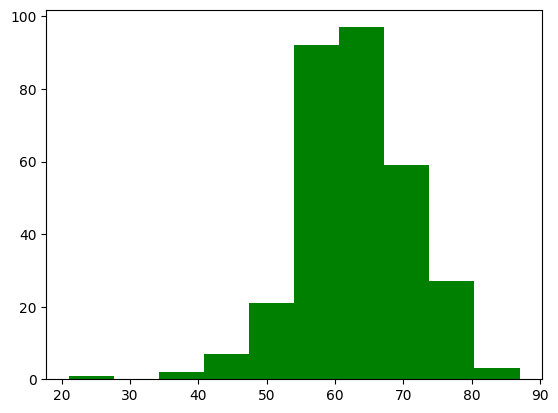

In [11]:
plt.hist(data['AGE'], color  ='green')
plt.show()

In [12]:
gender = data['GENDER'].value_counts()


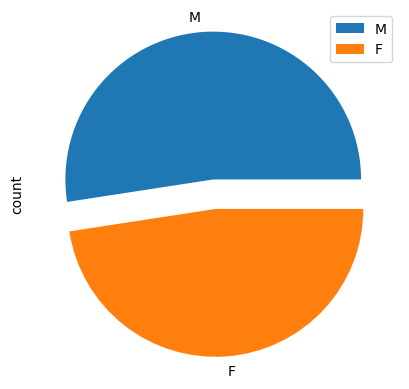

In [13]:
gender.plot(kind='pie', legend=True, textprops = {'color':'black'}, explode = (0.1, 0.1))
autopct = '%.2f'
plt.show()

In [14]:
data['SMOKING'].value_counts()


SMOKING
2    174
1    135
Name: count, dtype: int64

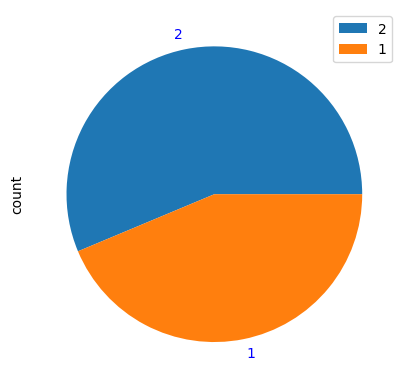

In [15]:
smoking = data['SMOKING'].value_counts()
smoking.plot(kind='pie', legend=True, textprops = {'color':'blue'}, explode = (0, 0))
autopct = '%.2f'

In [16]:
data['SHORTNESS OF BREATH'].value_counts()


SHORTNESS OF BREATH
2    198
1    111
Name: count, dtype: int64

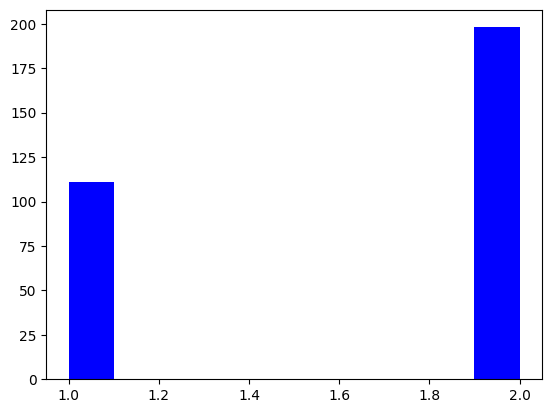

In [17]:
plt.hist(data['SHORTNESS OF BREATH'], color  ='blue')
plt.show()

In [18]:
data['COUGHING'].value_counts()

COUGHING
2    179
1    130
Name: count, dtype: int64

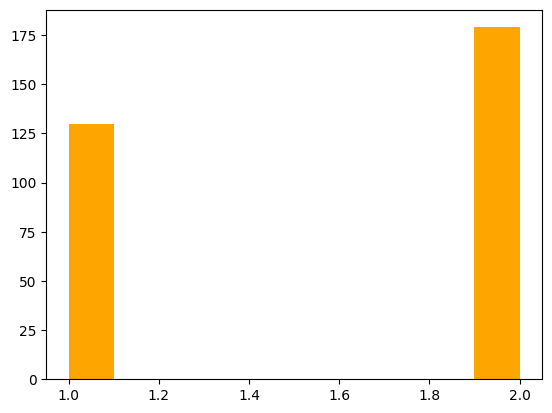

In [19]:
plt.hist(data['COUGHING'], color  ='orange')
plt.show()

In [20]:
data['CHEST PAIN'].value_counts()

CHEST PAIN
2    172
1    137
Name: count, dtype: int64

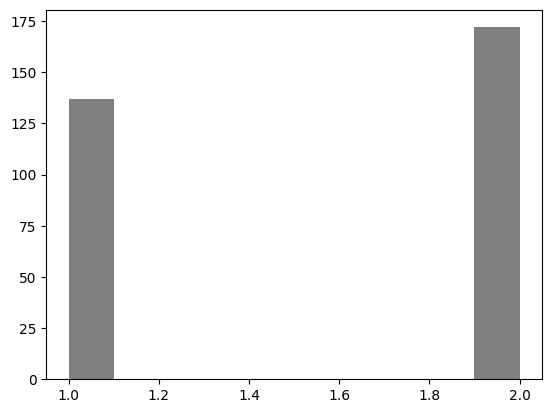

In [21]:
plt.hist(data['CHEST PAIN'], color  ='grey')
plt.show()

In [22]:
data['SWALLOWING DIFFICULTY'].value_counts()

SWALLOWING DIFFICULTY
1    164
2    145
Name: count, dtype: int64

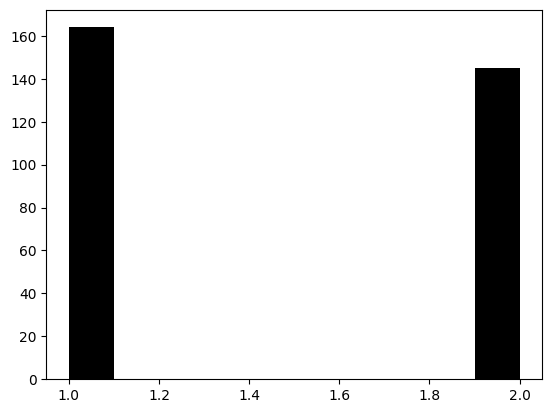

In [23]:
plt.hist(data['SWALLOWING DIFFICULTY'], color  ='black')
plt.show()

In [24]:
data['ALCOHOL CONSUMING'].value_counts()

ALCOHOL CONSUMING
2    172
1    137
Name: count, dtype: int64

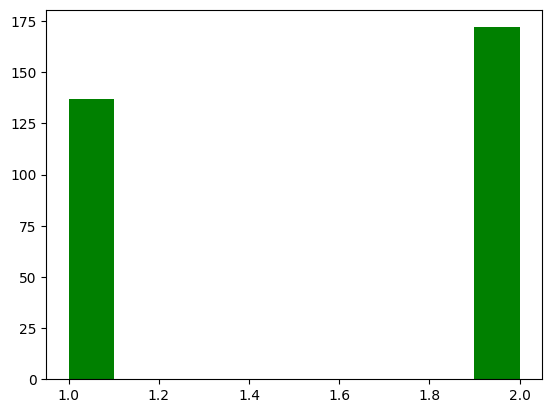

In [25]:
plt.hist(data['ALCOHOL CONSUMING'], color  ='green')
plt.show()

In [26]:
data['WHEEZING'].value_counts()

WHEEZING
2    172
1    137
Name: count, dtype: int64

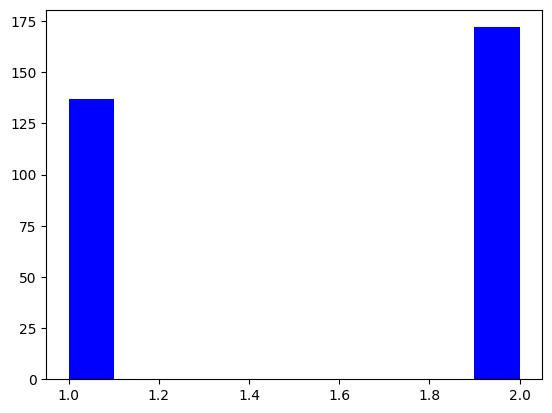

In [27]:
plt.hist(data['WHEEZING'], color  ='blue')
plt.show()

In [28]:
data['YELLOW_FINGERS'].value_counts()

YELLOW_FINGERS
2    176
1    133
Name: count, dtype: int64

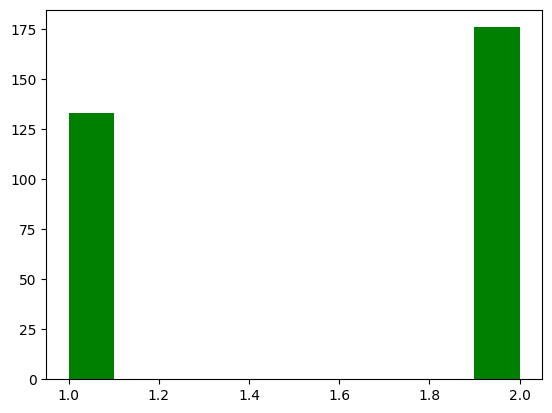

In [29]:
plt.hist(data['YELLOW_FINGERS'], color  ='green')
plt.show()

In [30]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
data['GENDER']=le.fit_transform(data['GENDER'])
data['LUNG_CANCER']=le.fit_transform(data['LUNG_CANCER'])
data['SMOKING']=le.fit_transform(data['SMOKING'])
data['YELLOW_FINGERS']=le.fit_transform(data['YELLOW_FINGERS'])
data['ANXIETY']=le.fit_transform(data['ANXIETY'])
data['PEER_PRESSURE']=le.fit_transform(data['PEER_PRESSURE'])
data['CHRONIC DISEASE']=le.fit_transform(data['CHRONIC DISEASE'])
data['FATIGUE']=le.fit_transform(data['FATIGUE '])
data['ALLERGY']=le.fit_transform(data['ALLERGY '])
data['WHEEZING']=le.fit_transform(data['WHEEZING'])
data['ALCOHOL CONSUMING']=le.fit_transform(data['ALCOHOL CONSUMING'])
data['COUGHING']=le.fit_transform(data['COUGHING'])
data['SHORTNESS OF BREATH']=le.fit_transform(data['SHORTNESS OF BREATH'])
data['SWALLOWING DIFFICULTY']=le.fit_transform(data['SWALLOWING DIFFICULTY'])
data['CHEST PAIN']=le.fit_transform(data['CHEST PAIN'])
data['LUNG_CANCER']=le.fit_transform(data['LUNG_CANCER'])

In [31]:
data.corr()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,FATIGUE,ALLERGY
GENDER,1.000000,0.021306,0.036277,-0.212959,-0.152127,-0.275564,-0.204606,-0.083560,0.154251,0.141207,0.454268,0.133303,-0.064911,-0.078161,0.362958,0.067254,-0.083560,0.154251
AGE,0.021306,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104,0.089465,0.012614,0.027990
SMOKING,0.036277,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117,0.058179,-0.029575,0.001913
YELLOW_FINGERS,-0.212959,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829,0.181339,-0.118058,-0.144300
ANXIETY,-0.152127,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634,0.144947,-0.188538,-0.165750
PEER_PRESSURE,-0.275564,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828,0.186388,0.078148,-0.081800
CHRONIC DISEASE,-0.204606,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938,0.110891,-0.110529,0.106386
FATIGUE,-0.083560,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832,0.150673,1.000000,0.003056
ALLERGY,0.154251,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433,0.327766,0.003056,1.000000
WHEEZING,0.141207,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640,0.249300,0.141937,0.173867


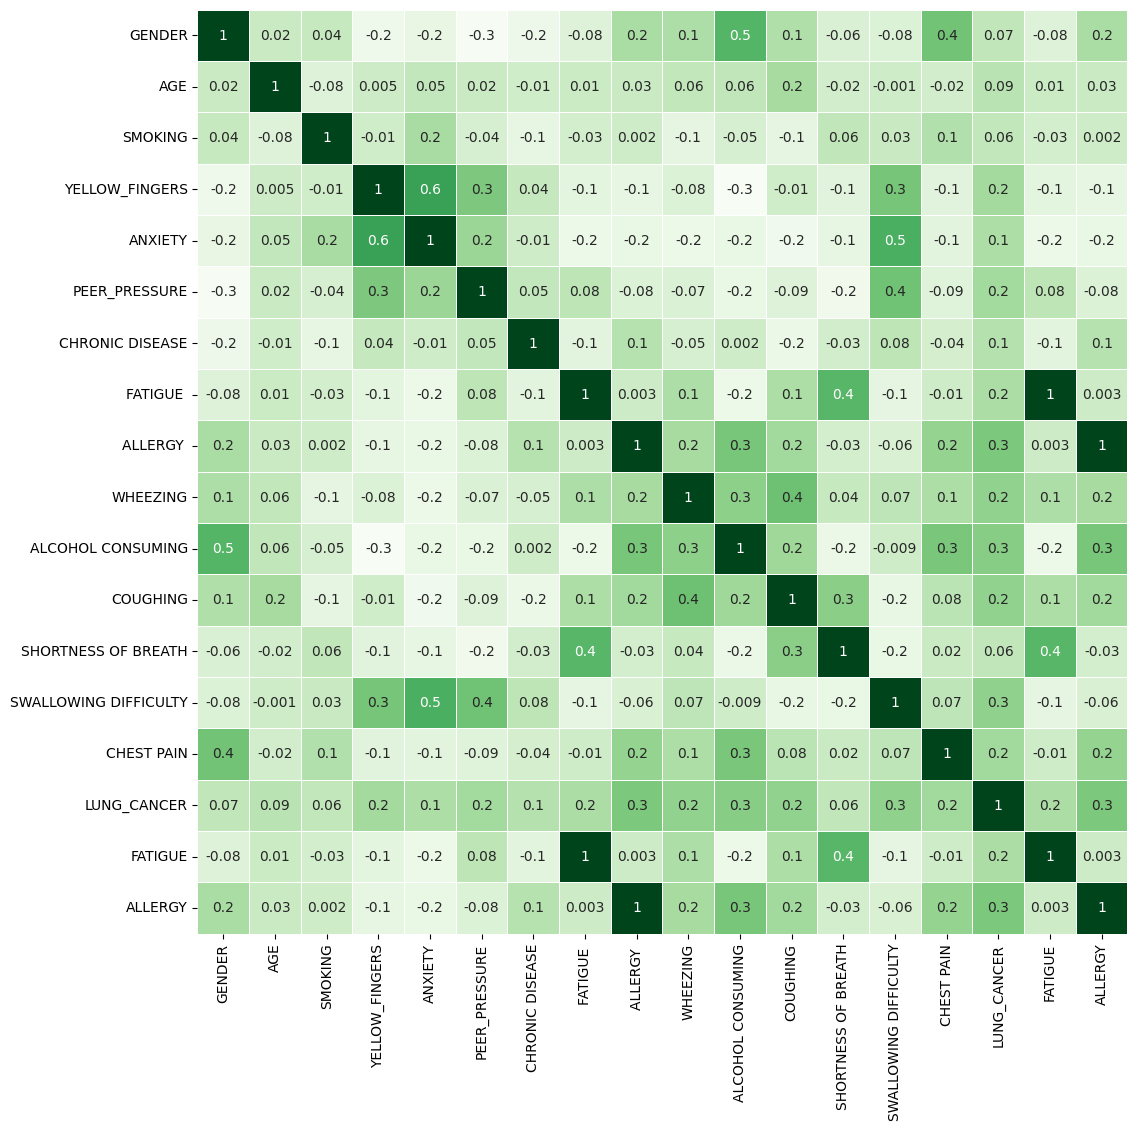

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(12,12))# to create a correlation heatmap
sns.heatmap(data.corr(), annot=True, fmt='.1g', cbar=False, linewidths=0.5, cmap ='Greens'); 

In [33]:
x = data[['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN']].values

y = data['LUNG_CANCER'].values

In [34]:
x.size

4635

In [35]:
x.shape

(309, 15)

In [36]:
y.size

309

In [37]:
y.shape

(309,)

# GAUSSIAN NAIVE BAYES 

In [38]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.33, random_state = 1)

In [40]:
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.9227053140096618

In [41]:
predictions = model.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score, roc_curve

In [43]:
print('accuracy:',accuracy_score(y_test, predictions))
print('precision:',precision_score(y_test, predictions))
print('f1_score:',f1_score(y_test, predictions))
print('recall:',recall_score(y_test, predictions))

accuracy: 0.8627450980392157
precision: 0.9325842696629213
f1_score: 0.9222222222222223
recall: 0.9120879120879121


In [44]:
print(confusion_matrix(y_test, predictions))

[[ 5  6]
 [ 8 83]]


In [45]:
sensitivity_score = recall_score
from sklearn.metrics import precision_recall_fscore_support

In [46]:
print(precision_recall_fscore_support(y_test, predictions))
def specificity_score(y_true, predictions):
                      p,r,f,s = precision_recall_fscore_support(y_true, predictions)
                      return r[0]
print('specificity_score:',specificity_score(y_test, predictions))

(array([0.38461538, 0.93258427]), array([0.45454545, 0.91208791]), array([0.41666667, 0.92222222]), array([11, 91]))
specificity_score: 0.45454545454545453


In [47]:
prob= model.predict_proba(x_test)
fpr, tpr,thresholds = roc_curve(y_test, prob[:,1])

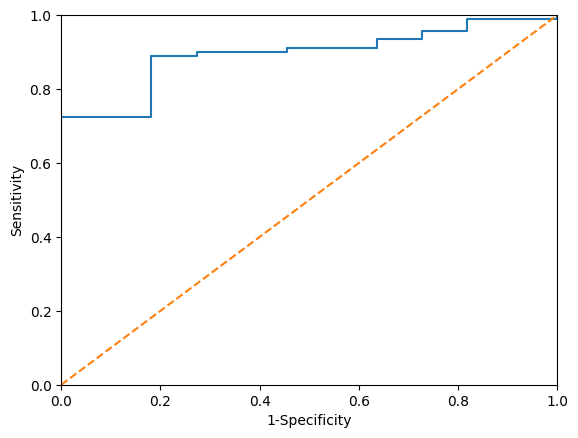

In [48]:
plt.plot(fpr,tpr)  # to plot the roc curve
plt.plot([0,1],[0,1],linestyle= '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.0])
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()